# Section 4.3: Reverts per page (setup and exploratory)

This is a data analysis script used to produce findings in the paper, which you can run based entirely off the files in this GitHub repository. This notebook produces part of the analysis for all languages, and the notebook `4-3-reverts-per-page-enwiki-plots` is an independent replication of this analysis in R that contains plots for the English Wikipedia, which are included in the paper. Note that the R notebook cannot be run on mybinder due to memory requirements, while this one can be.

This entire notebook can be run from the beginning with Kernel -> Restart & Run All in the menu bar. It takes less than 1 minute to run on a laptop running a Core i5-2540M processor.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import glob
import datetime
import pickle
%matplotlib inline

In [2]:
start = datetime.datetime.now()

## Load data

In [3]:
!unxz --keep --force ../../datasets/parsed_dataframes/df_all_2016.pickle.xz

In [4]:
!ls ../../datasets/parsed_dataframes/*.pickle

../../datasets/parsed_dataframes/df_all_2016.pickle
../../datasets/parsed_dataframes/df_all_comments_parsed_2016.pickle
../../datasets/parsed_dataframes/possible_botfights.pickle


In [5]:
with open("../../datasets/parsed_dataframes/df_all_2016.pickle", "rb") as f:
    df_all = pickle.load(f)

In [6]:
df_all.sample(2).transpose()

90862   \
archived                                                                     False   
language                                                                        en   
page_namespace                                                                   0   
rev_deleted                                                                  False   
rev_id                                                                    69823123   
rev_minor_edit                                                                True   
rev_page                                                                   2395356   
rev_parent_id                                                          6.46626e+07   
rev_revert_offset                                                                1   
rev_sha1                                           0ufq2o0ujnx0qc5euv3qdh7nabyrld3   
rev_timestamp                                                       20060815154332   
rev_user                                                                    279219   
rev_user_text                                                              RussBot   
reverted_to_rev_id                                                        64662558   
reverting_archived                                                           False   
reverting_comment                Bot: Fixing double redirect to [[Joseph Sill C...   
reverting_deleted                                                            False   
reverting_id                                                             401301532   
reverting_minor_edit                                                          True   
reverting_page                                                             2395356   
reverting_parent_id                                                    6.98231e+07   
reverting_sha1                                     pcff5y3c7xlyidq5p9zw52innqimd6z   
reverting_timestamp                                                 20101208193352   
reverting_user                                                             8066546   
reverting_user_text                                                          Xqbot   
revisions_reverted                                                               1   
namespace_type                                                             article   
reverted_timestamp_dt                                          2006-08-15 15:43:32   
reverting_timestamp_dt                                         2010-12-08 19:33:52   
time_to_revert                                                  1576 days 03:50:20   
time_to_revert_hrs                                                         37827.8   
time_to_revert_days                                                        1576.16   
reverting_year                                                                2010   
time_to_revert_days_log10                                                   3.1976   
time_to_revert_hrs_log10                                                   4.57781   
reverting_comment_nobracket                         Bot: Fixing double redirect to   
botpair                                                           Xqbot rv RussBot   
botpair_sorted                                                ['RussBot', 'Xqbot']   
reverts_per_page_botpair                                                         1   
reverts_per_page_botpair_sorted                                                  1   

                                                                            288675  
archived                                                                     False  
language                                                                        en  
page_namespace                                                                   1  
rev_deleted                                                                  False  
rev_id                                                                    81847193  
rev_minor_edit                         

## Number of reverts per page per bot pair
### Group by language, page ID, and botpair_sorted
Grouping by these three columns creates a very simple and useful intersection for this metric. If there is only one revert for a language/page ID/botpair_sorted set, then the reverting bot's revert was for sure unreciprocated by the reverted bot. If there are two reverts, then the most likely outcome is that the reverting bot's revert was followed by a revert by the reverted bot, although this could also mean that the reverting bot reverted the reverted bot twice. Higher counts imply heavy back-and-forth reverts between two bots on a single page.

We count the number of reverts with the same language, page ID, and sorted botpair, then assign that value to `reverts_per_page_botpair_sorted` for every revert matching these three columns. Note that this initial analysis is conducted in `0-load-process-data.ipynb`, but we have included it again for clarity.

In [7]:
groupby_lang_page_bps = df_all.groupby(["language", "rev_page", "botpair_sorted"])

In [8]:
df_groupby = pd.DataFrame(groupby_lang_page_bps['rev_id'].count()).reset_index().rename(columns={"rev_id":"reverts_per_page_botpair_sorted"})
df_groupby.sample(25)

language  rev_page                     botpair_sorted  \
763452       zh    430781            ['Addbot', 'TuHan-Bot']   
491767       es   1509221            ['KLBot2', 'Thijs!bot']   
687833       pt     95122         ['HerculeBot', 'TXiKiBoT']   
691638       pt    137599         ['HRoestBot', 'MerlIwBot']   
340046       en  25742559            ['Xqbot', 'タチコマ robot']   
491978       es   1525587             ['MystBot', 'ZéroBot']   
6190         de     96875            ['OKBot', 'ToePeu.bot']   
81268        en    561329  ['Amalthea (bot)', 'Cyberbot II']   
222176       en  13365708           ['KLBot2', 'NjardarBot']   
661025       ja    917372          ['TXiKiBoT', 'VolkovBot']   
115437       en   2802848             ['Addbot', 'Rubinbot']   
391836       en  30933876           ['Addbot', 'Luckas-bot']   
271258       en  18640319            ['Addbot', 'Thijs!bot']   
655919       ja    595560         ['AStarBot', 'Luckas-bot']   
779963       zh   1289505             ['Addbot', 'TXiKiBoT']   
109468       en   2291974             ['Addbot', 'EmausBot']   
11653        de    304134      ['EmausBot', 'WikitanvirBot']   
741953       pt   2859186             ['EmausBot', 'KLBot2']   
183182       en   9193804               ['RussBot', 'Xqbot']   
206704       en  11808922         ['GrouchoBot', 'SassoBot']   
769146       zh    701155             ['Addbot', 'TXiKiBoT']   
372489       en  28729197               ['Fbot', 'SteveBot']   
598          de      3328             ['MastiBot', 'RedBot']   
99977        en   1598036               ['AvicBot', 'Xqbot']   
502222       es   2344762         ['DSisyphBot', 'DumZiBoT']   

        reverts_per_page_botpair_sorted  
763452                                1  
491767                                1  
687833                                1  
691638                                1  
340046                                1  
491978                                2  
6190                                  1  
81268                                 1  
222176                                1  
661025                                1  
115437                                1  
391836                                1  
271258                                1  
655919                                1  
779963                                1  
109468                                1  
11653                                 1  
741953                                1  
183182                                1  
206704                                1  
769146                                1  
372489                                1  
598                                   1  
99977                                 1  
502222                                1

### Add reverts_per_page_botpair_sorted to df_all

In [9]:
df_all = df_all.drop("reverts_per_page_botpair_sorted",1)
    
    

df_all = pd.merge(df_all, df_groupby, how='left',
         left_on=["language", "rev_page", "botpair_sorted"],
         right_on=["language", "rev_page", "botpair_sorted"])

## Analysis
### Number of reverts by revert_per_page_botpair_sorted, all languages, articles only

For example, 528,104 reverts were not reciprocated at all. 25,528 reverts were part of a two-bot revert chain on the same page in the same language lasting 2 reverts. 3,987 reverts were part of a two-bot revert chain in the same page in the same language lasting 3 reverts, and so on.

In [10]:
df_all.query("page_namespace == 0").reverts_per_page_botpair_sorted.value_counts().sort_index()

1     528104
2      25528
3       3987
4       1212
5        540
6        336
7        259
8        176
9        135
10        60
11        44
12        96
13       143
14        70
15        90
16        80
17        85
18        54
19        95
20        20
21        42
22        88
23       138
24        72
28        56
29        87
30        90
31        93
35        35
39        39
41        82
Name: reverts_per_page_botpair_sorted, dtype: int64

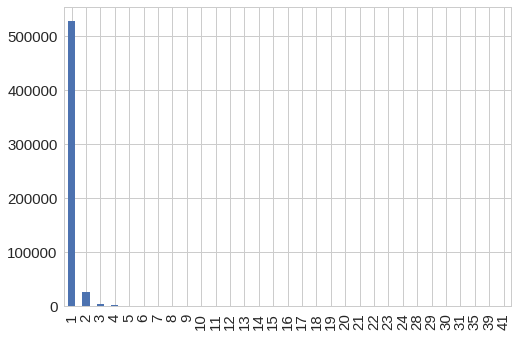

In [11]:
sns.set(font_scale=1.5, style="whitegrid")
df_all.query("page_namespace == 0").reverts_per_page_botpair_sorted.value_counts().sort_index().plot(kind='bar')

### Number of reverts by revert_per_page_botpair_sorted, English only, articles only


In [12]:
df_all.query("page_namespace == 0 and language=='en'").reverts_per_page_botpair_sorted.value_counts().sort_index()

1     228198
2      13012
3       1860
4        476
5        120
6         24
7         28
8         32
9         27
10        10
11        11
13        39
14        28
15        60
16        16
17        51
18        54
19        38
20        20
21        21
22        22
23        92
24        72
28        56
29        87
30        90
31        93
35        35
39        39
41        82
Name: reverts_per_page_botpair_sorted, dtype: int64

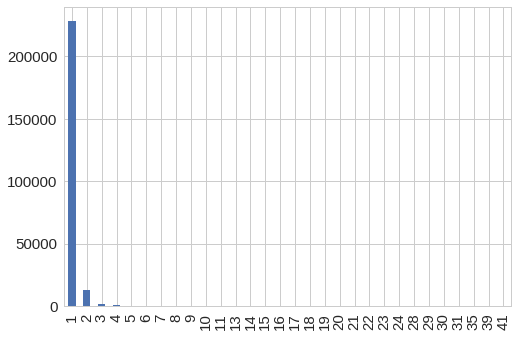

In [13]:
sns.set(font_scale=1.5, style="whitegrid")
df_all.query("page_namespace == 0 and language == 'en'").reverts_per_page_botpair_sorted.value_counts().sort_index().plot(kind='bar')

### Checking that the sum of the counts and the total number of reverts are the same

In [14]:
df_all.query("page_namespace == 0 and language=='en'").reverts_per_page_botpair_sorted.value_counts().sum()

244793

In [15]:
len(df_all.query("page_namespace == 0 and language=='en'"))

244793

## Finding pages with more than 500 reverts by/on the same bots

In [16]:
gb = df_all.query("reverts_per_page_botpair_sorted > 500").groupby(["language", "page_namespace", "rev_page", "botpair_sorted"])

In [17]:
gb['rev_id'].count()

language  page_namespace  rev_page  botpair_sorted                              
en        4               974956    ['AnomieBOT', 'Legobot']                          521
                          4626266   ['ClueBot NG', 'HBC AIV helperbot']              2047
                                    ['ClueBot NG', 'HBC AIV helperbot11']            2538
                                    ['ClueBot NG', 'HBC AIV helperbot5']             8723
                                    ['ClueBot NG', 'HBC AIV helperbot7']            10473
                                    ['ClueBot', 'HBC AIV helperbot2']                1002
                                    ['ClueBot', 'HBC AIV helperbot3']                5822
                                    ['ClueBot', 'HBC AIV helperbot4']                1545
                                    ['ClueBot', 'HBC AIV helperbot5']                3007
                                    ['ClueBot', 'HBC AIV helperbot7']                4110
                   

From a manual lookup:

page_id	page_title
- 974956	Possibly_unfree_files
- 4626266	Administrator_intervention_against_vandalism/TB2
- 5964327	Suspected_copyright_violations
- 11005908	Tutorial/Editing/sandbox
- 11238105	Usernames_for_administrator_attention/Bot

### How many total bot-bot reverts in these pages?

In [18]:
len(df_all.query("language == 'en' and rev_page == 4626266"))

55739

In [19]:
len(df_all.query("language == 'en' and rev_page == 11238105"))

18919

In [20]:
len(df_all.query("language == 'en' and rev_page == 5964327"))

3659

### Median time to revert for a Mathbot-curated list

In [21]:
df_all.query("language == 'en' and rev_page == 5971841").groupby("botpair")['time_to_revert_days'].median()

botpair
FrescoBot rv Mathbot    36.399456
Mathbot rv DrilBot       0.556840
Mathbot rv FrescoBot     0.670440
Mathbot rv Yobot         0.944352
Yobot rv Mathbot        12.057517
Name: time_to_revert_days, dtype: float64

## Runtime

In [22]:
end = datetime.datetime.now()

time_to_run = end - start
minutes = int(time_to_run.seconds/60)
seconds = time_to_run.seconds % 60
print("Total runtime: ", minutes, "minutes, ", seconds, "seconds")

Total runtime:  0 minutes,  15 seconds
